# Introduction
<a id='sec:intro'></a>

## Background: Oil
<a id='sec:intro_oil'></a>

## Outline of report
<a id='sec:outline'></a>
This report is organised as follows. 
1. [Read and plot historical oil prices](#sec:read_and_plot)
2. [Look for seasonal patterns](#sec:seasonality_patterns)
3. [Check for stationarity](#sec:stationarity)

# Read and plot historical oil prices
<a id='sec:read_and_plot'></a>

In [1]:
"""======================="""
"""  IMPORTING LIBRARIES  """
"""======================="""
# Import all necassary libraries used throughout
import datetime as dt
import pandas as pd
pd.set_option('float_format', '{:0.2f}'.format)
import numpy as np
import os
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore") # uncomment to see all warnings

# Import plotting functionality
import matplotlib as mpl
from matplotlib import pyplot as plt
fig_width=9
fig_height=4
mpl.rcParams['figure.dpi']= 200
mpl.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
mpl.rcParams.update({'font.size': 10})
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from numpy import log
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA

# Hold the current working directory in a variable
pwd = os.getcwd()

In [2]:
"""======================="""
""" READ THE DATA         """
"""======================="""
## Import the csv file into a pandas DataFrame
df = pd.read_csv( pwd + '/historical_oil_prices.csv')

## Change column names to lowercases 
## for ease when typing
df.columns=['date', 'price']

## Cast the date column to type 'date'
df['date'] = pd.to_datetime(df['date'])
print("> Data Set: \t"% df.columns, df.shape)
print("\n> Data Types:\n", df.dtypes)

## Set the index of the table to be the date
df.set_index('date', inplace=True)
df = df.resample('D').ffill().reset_index()

## Check if there is any data missing
if df.isnull().values.any():
    print("Missing data")

> Data Set: 	 (8542, 2)

> Data Types:
 date     datetime64[ns]
price           float64
dtype: object


In [3]:
# print the first and last five rows of the pandas dataframe
with pd.option_context('display.max_rows',10):
    print(df)

            date  price
0     1987-05-20  18.63
1     1987-05-21  18.45
2     1987-05-22  18.55
3     1987-05-23  18.55
4     1987-05-24  18.55
...          ...    ...
12286 2021-01-07  53.70
12287 2021-01-08  55.51
12288 2021-01-09  55.51
12289 2021-01-10  55.51
12290 2021-01-11  54.84

[12291 rows x 2 columns]


In [4]:
df.describe()

,price
count,12291.00
mean,46.45
std,32.31
min,9.10
25%,18.83
50%,33.20
75%,66.59
max,143.95


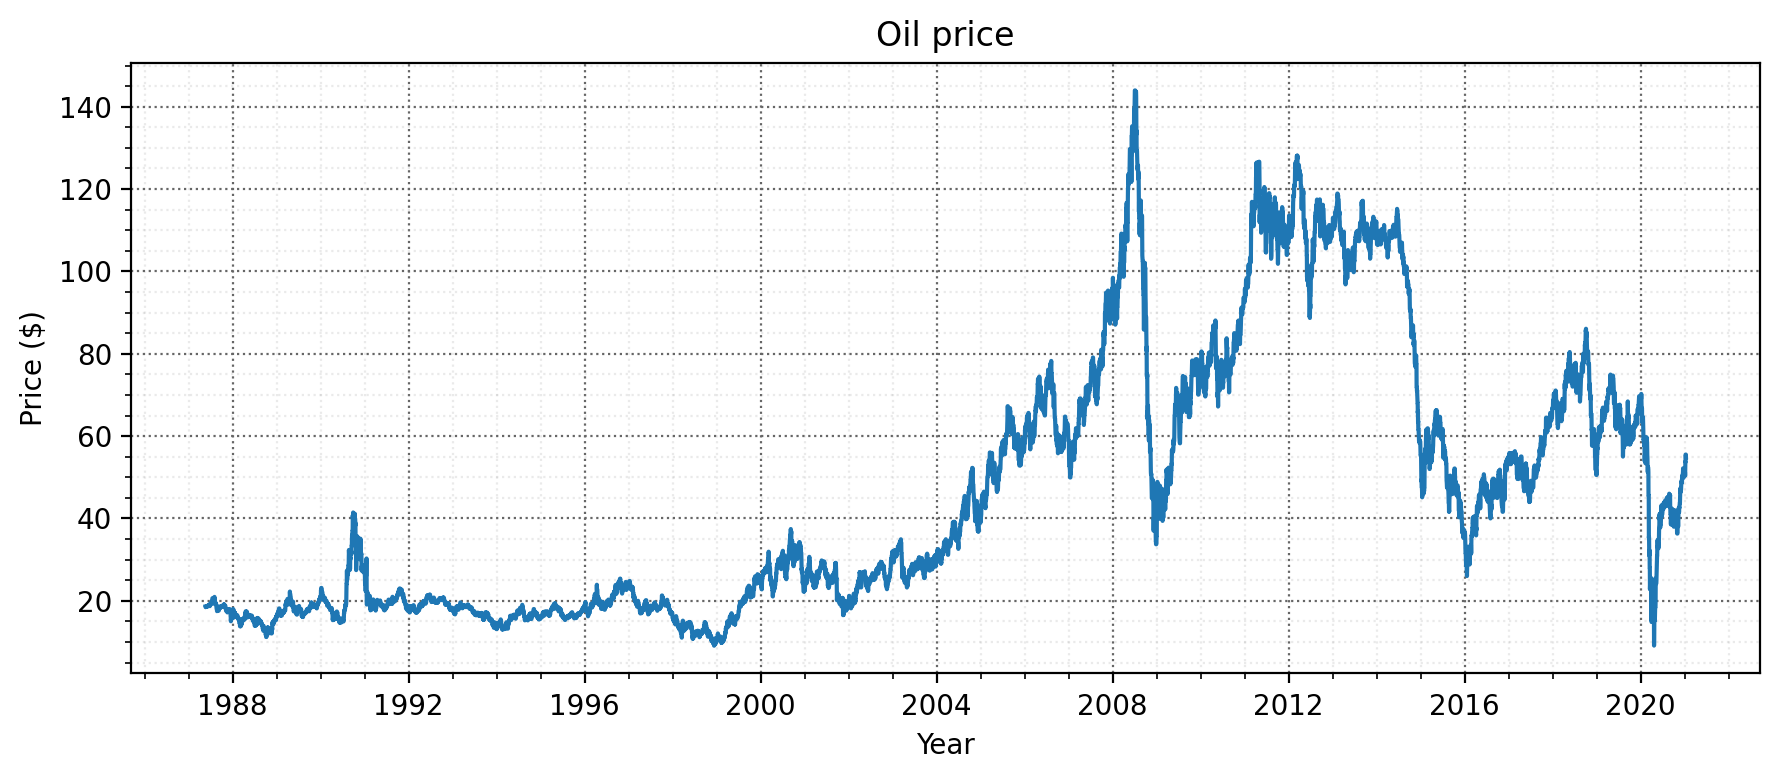

In [5]:
"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(df['date'],df['price'])
plt.title("Oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')
## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.tight_layout()
plt.savefig(pwd+"/oil_prices.png")
plt.show()

The figure above shows that the price of oil can range widely depending on the year. The sharp peaks and troughs in the plot above coincide with news related to oil. For example, the sharp peak and trough that occured in 2008 was due to the 2008 financial crisis. The crisis had a significant negative impact on the price of crude oil and gas, from the figure we can see that the Europe Brent Spot Price fell from approximately \\$140 to \\$35, which translates to ~75\\% decline in price. The financial crisis led to a recession which reduced employment. With lower employment, there was less spending, thus demand for oil by both consumers and businesses was lowered. The recovery to \\$100+ prices took just under four years. 

The sharp decline in oil price between 2014 and 2016 was due to many reasons, one of the major ones was the booming US shale oil production. The gains in efficiency lowered the break-even prices. Add to that the reduction in geopolitical concerns and shifting OPEC policies, the price did not recover as strongly as four years earlier. 

Then there was another sharp decline in 2020. This was due to the global COVID-19 pandemic. There has been a sharp recovery since but it is unclear if oil prices will rise or fall in the new year 2021. At this point, we could perform further analysis on the similarties between the three crashes and how oil prices did in the aftermath. But in the interest of brevity, we are going to move on. This is flagged for future work. 

Now, we are going to create new columns in the data frame that will make it easier to sort through the pandas DataFrame. We are going to create columns that denote the year, month and week for each entry in the DataFrame. This will be useful for us if we want to isolate data for a particular week, month, year of a combination of the aforementioned. 

In [6]:
## Add columns for the year, month and day
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week']  = df['date'].dt.week

## Group the DataFrame by year
summary = df.groupby("year").price.describe()
# print the first and last five rows of the pandas dataframe
with pd.option_context('display.max_rows',10):
    print(summary)

      count  mean   std   min   25%   50%   75%   max
year                                                 
1987 226.00 18.53  0.96 15.03 17.93 18.60 19.05 20.95
1988 366.00 14.96  1.47 11.20 14.00 15.16 16.15 17.95
1989 365.00 18.27  1.25 16.05 17.20 18.15 19.18 22.25
1990 365.00 23.70  7.71 14.68 17.05 20.60 30.53 41.45
1991 365.00 20.02  1.91 17.60 18.75 19.63 20.73 30.28
...     ...   ...   ...   ...   ...   ...   ...   ...
2017 365.00 54.24  5.42 43.98 50.41 54.16 56.86 66.80
2018 365.00 70.97  7.24 50.57 66.65 71.99 75.89 86.07
2019 365.00 64.34  4.36 50.57 61.12 64.02 67.35 74.94
2020 366.00 41.84 12.11  9.12 37.80 42.33 48.77 70.25
2021  11.00 53.28  1.98 50.37 51.22 53.70 55.17 55.51

[35 rows x 8 columns]


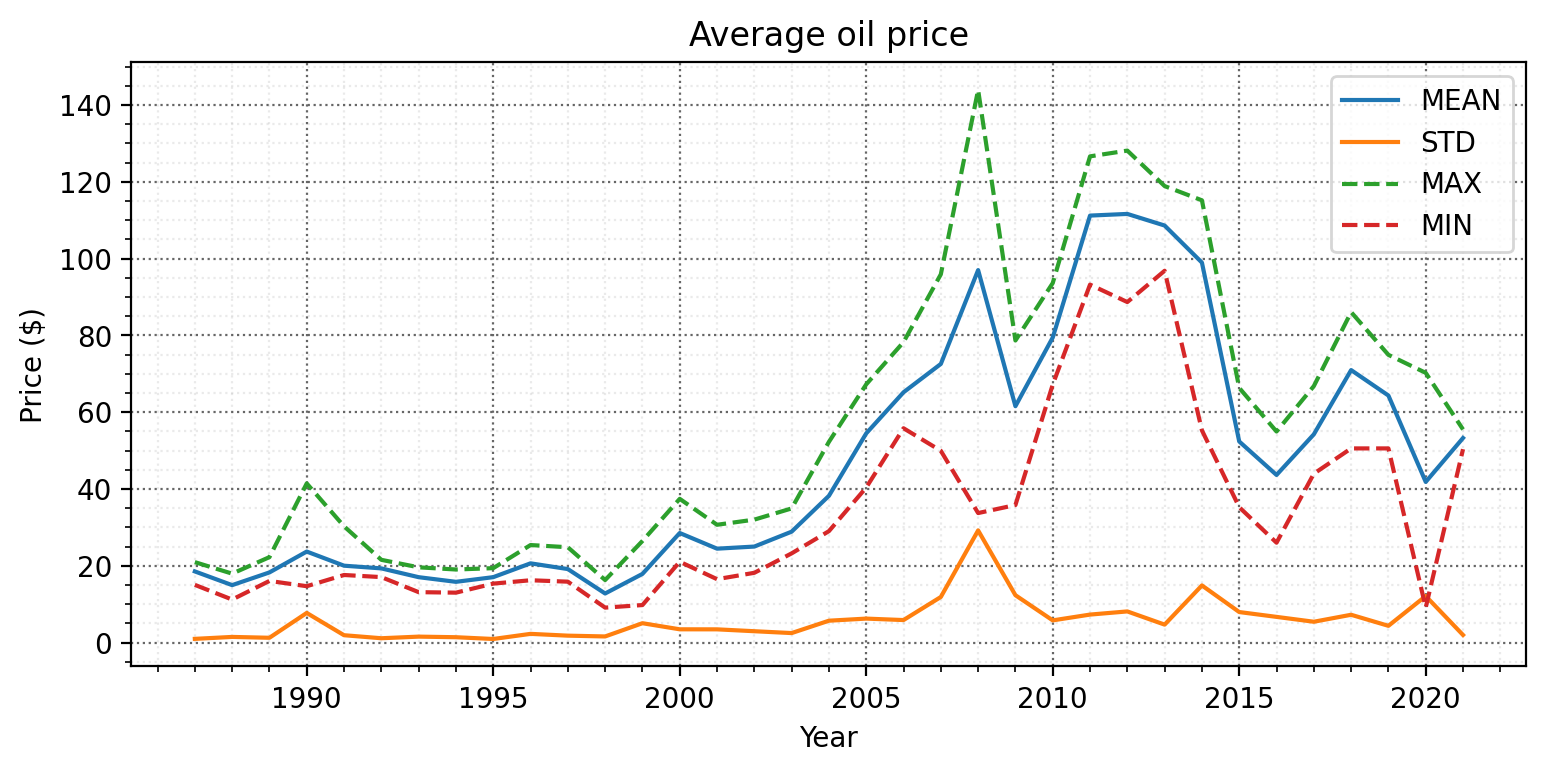

In [7]:
"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(summary['mean'], label='MEAN')
plt.plot(summary['std'], label='STD')
plt.plot(summary['max'],linestyle='--', label='MAX')
plt.plot(summary['min'],linestyle='--', label='MIN')
plt.title("Average oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend(loc='best')
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')

## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)

plt.show()

# Seasonal patterns in the time series
<a id='sec:seasonality_patterns'></a>

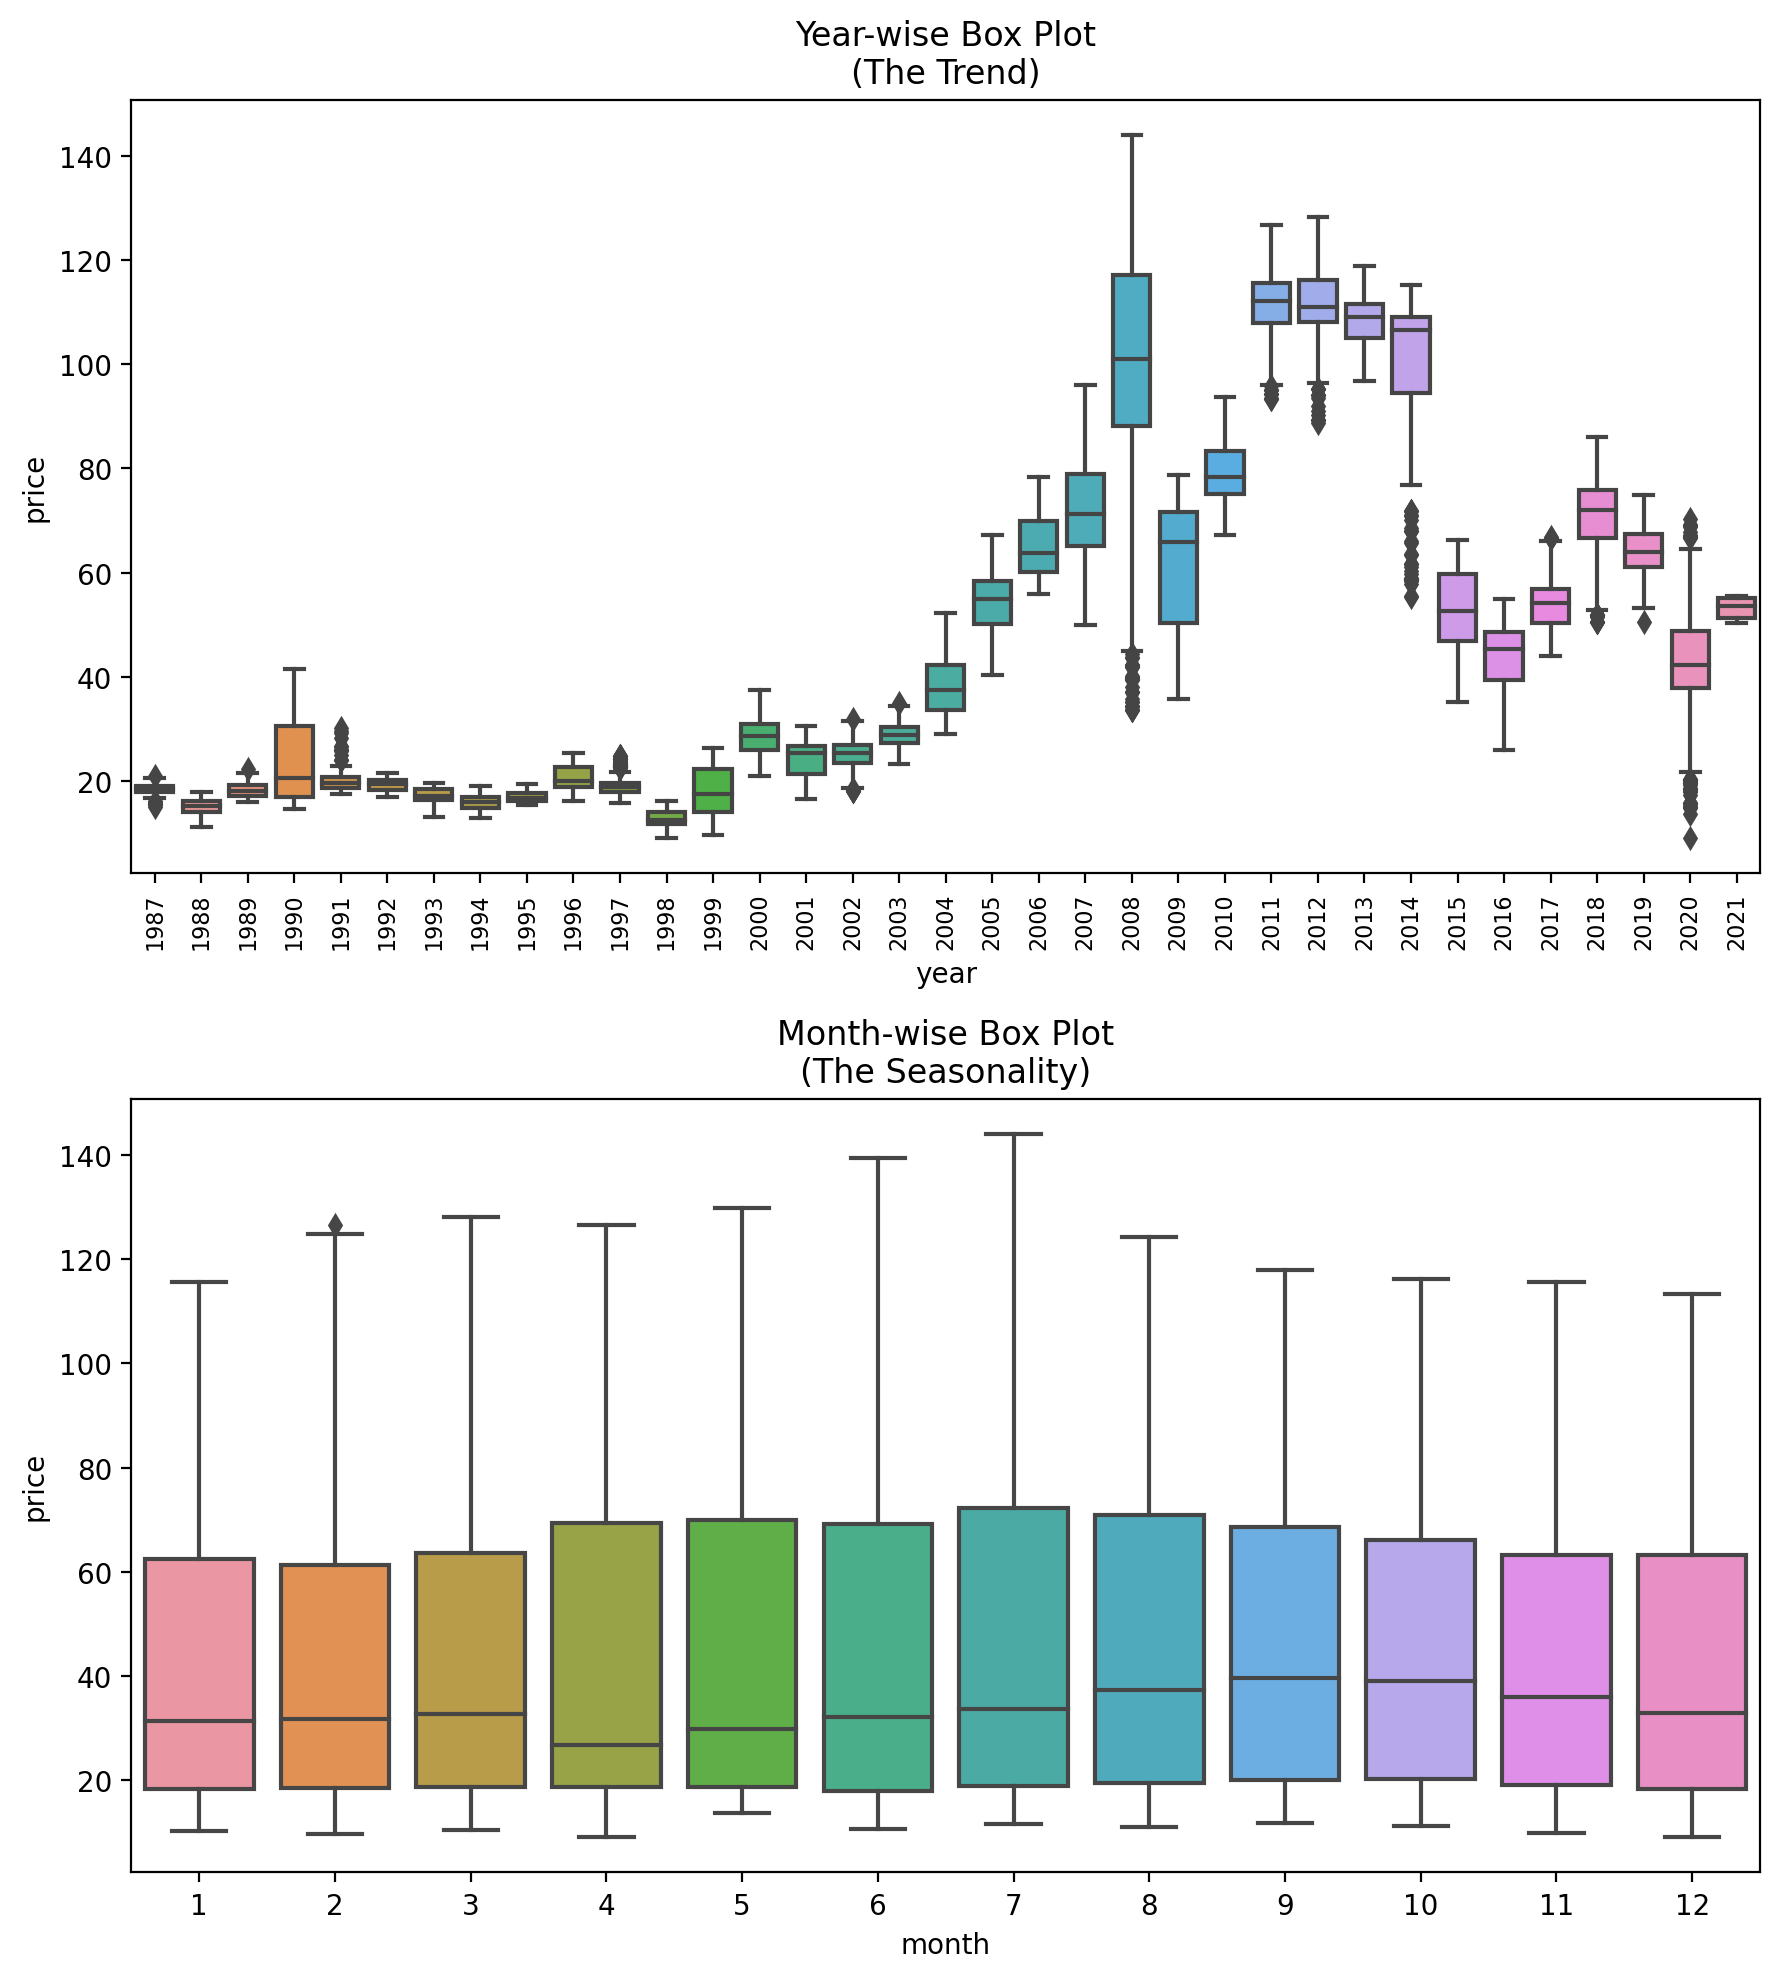

In [8]:
## Box plots for each year
months= df['month'].unique()
years = df['year'].unique()

fig, axes = plt.subplots(2, 1,figsize=(fig_width,fig_height*2.5))
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month',y='price', data=df.loc[df.year.isin(years), :])

axes[0].tick_params(axis='x', which='major', labelsize=8, rotation=90)
axes[0].set_title('Year-wise Box Plot\n(The Trend)'); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)')
fig.tight_layout()
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in the month-wise boxplot, it is evident that the months of June, July and August see the greatest rise in price. This could be a summer effect?


All time series can be split into the following components: __Base level__ + __Trend__ + __Seasonality__ + __Error__. A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day. However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true. Thus, a time series may be imagined as a combination of the trend, seasonality and the error terms.

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to *not* confuse ‘cyclic’ effect with ‘seasonal’ effect. 

We diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern as follows. If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

Let's see if we can decompose out oil prices time series into the aforementioned components.
Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

__Additive time series:__ 

Value = Base Level $+$ Trend $+$ Seasonality $+$ Error

__Multiplicative Time Series:__

Value = Base Level $\times$ Trend $\times$ Seasonality $\times$ Error

We are only going to look at the previous year, 2020.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## Change the indexing to date time format
df.index = pd.to_datetime(df['date'])
#del df['date']
data = df.loc[df.year.isin(['2020'])]
# Now, to get the year for each data entry
#print(df.index.year)
print(data)

                 date  price  year  month  week
date                                           
2020-01-01 2020-01-01  67.77  2020      1     1
2020-01-02 2020-01-02  67.05  2020      1     1
2020-01-03 2020-01-03  69.08  2020      1     1
2020-01-04 2020-01-04  69.08  2020      1     1
2020-01-05 2020-01-05  69.08  2020      1     1
...               ...    ...   ...    ...   ...
2020-12-27 2020-12-27  50.88  2020     12    52
2020-12-28 2020-12-28  50.88  2020     12    53
2020-12-29 2020-12-29  50.44  2020     12    53
2020-12-30 2020-12-30  50.74  2020     12    53
2020-12-31 2020-12-31  51.22  2020     12    53

[366 rows x 5 columns]


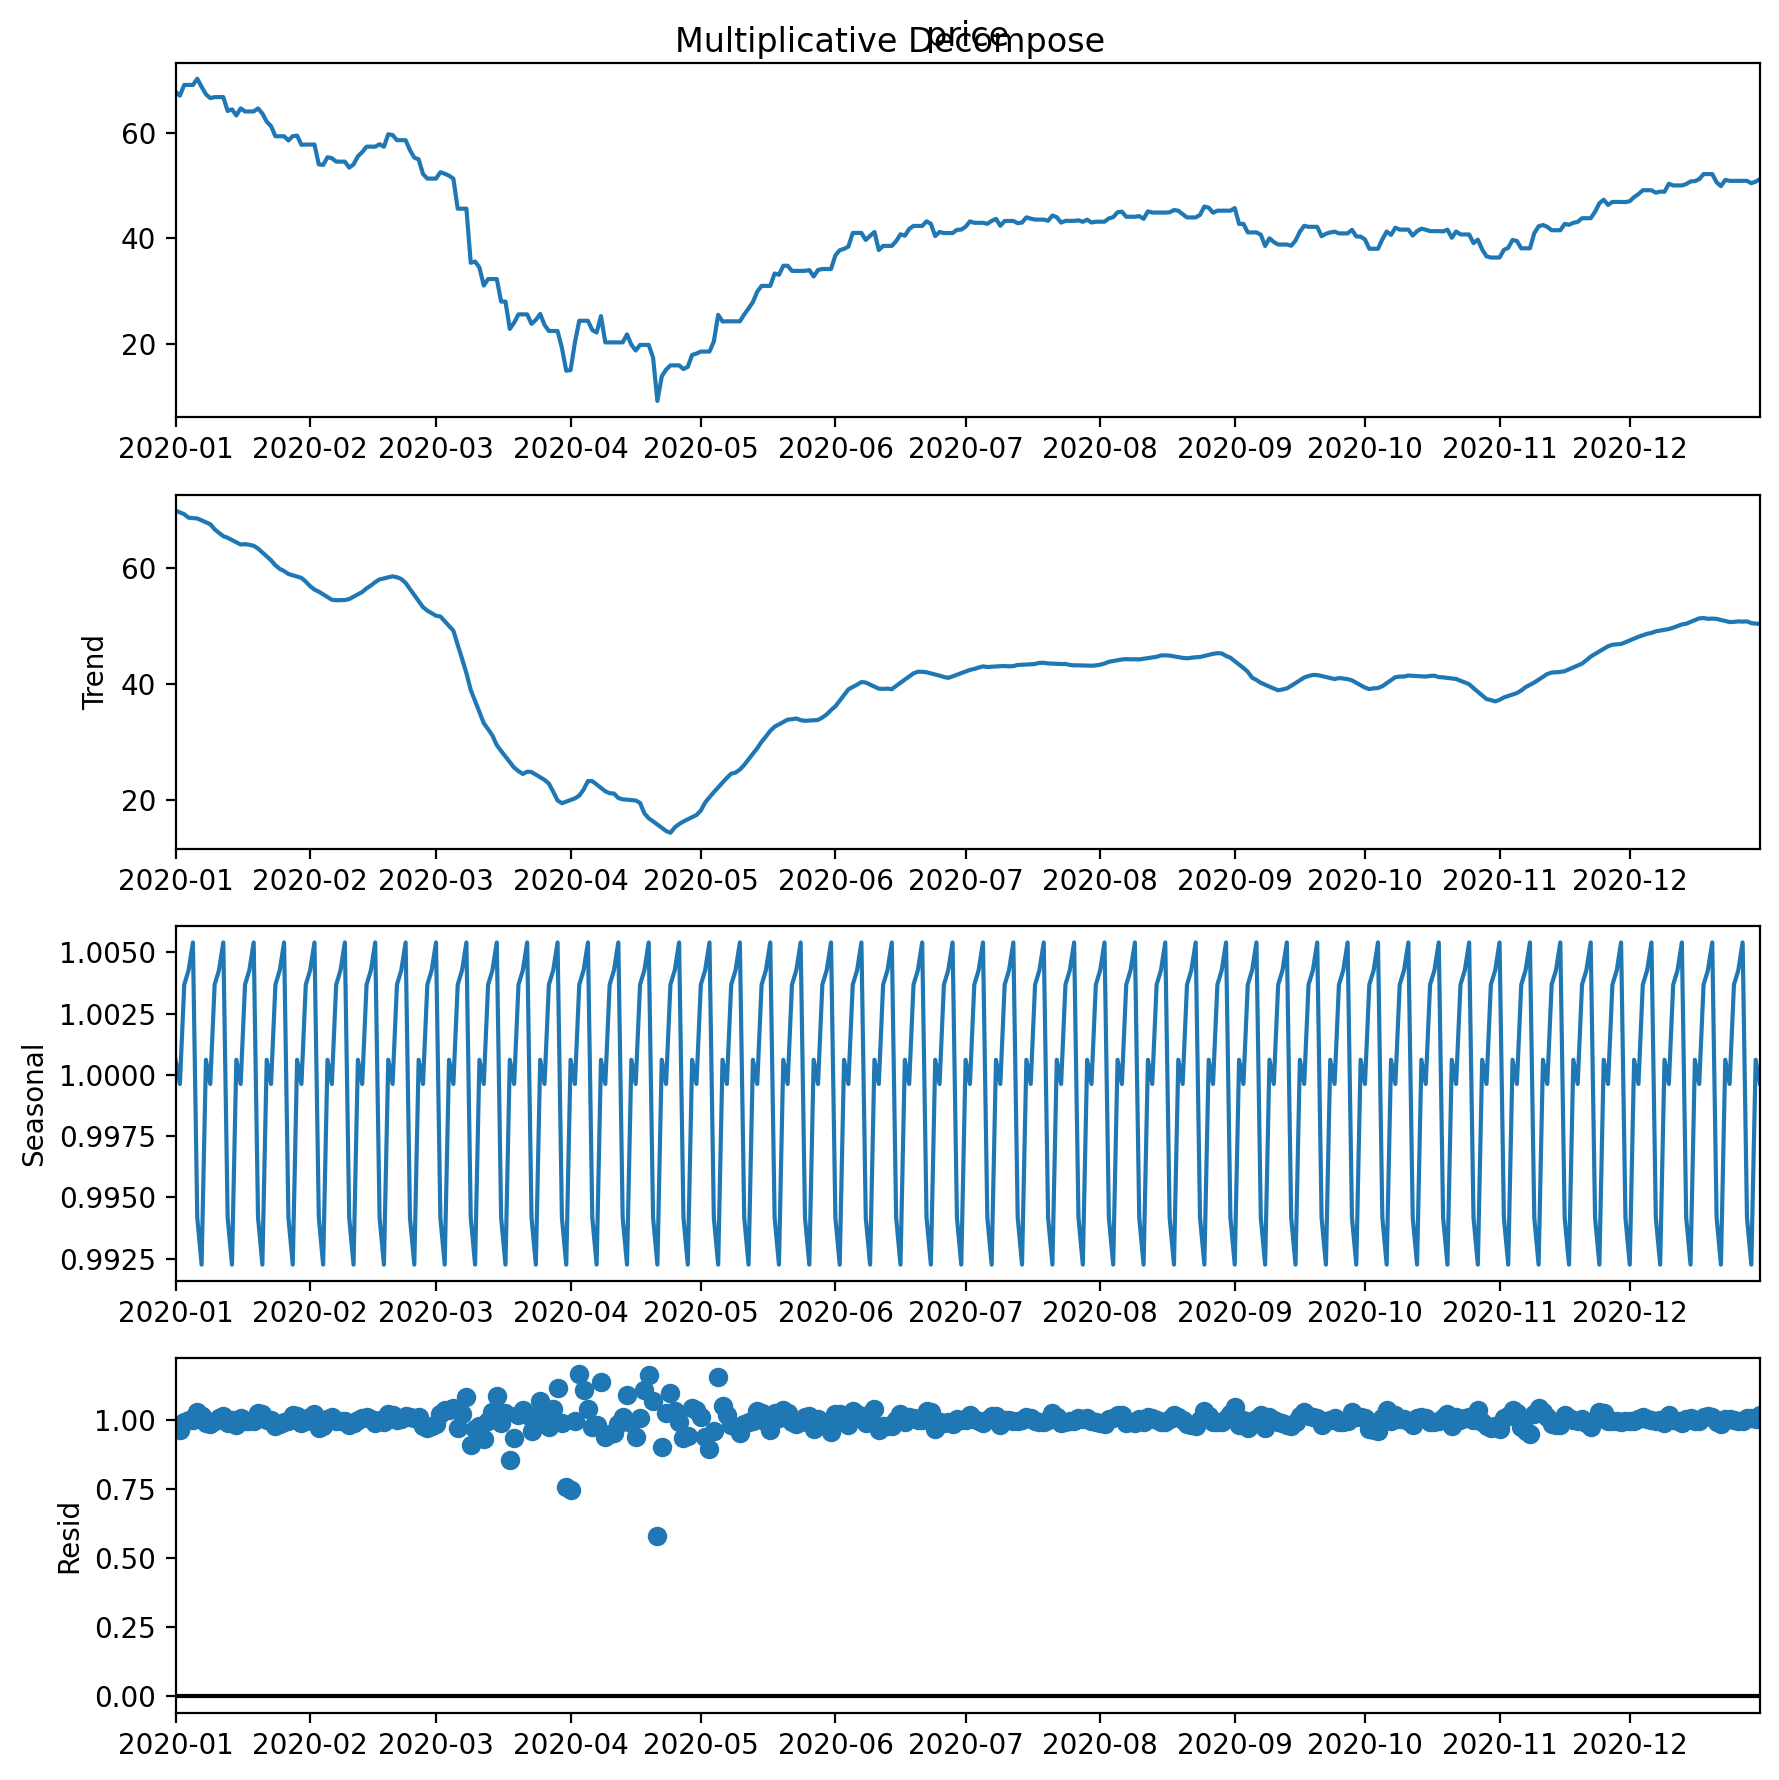

In [10]:
# Multiplicative Decomposition 
plt.rcParams.update({'figure.figsize': (fig_width,fig_width)})
decomp_mul = seasonal_decompose(data['price'], model='multiplicative', extrapolate_trend='freq')
decomp_mul.plot().suptitle('Multiplicative Decompose')
plt.tight_layout()
plt.show()

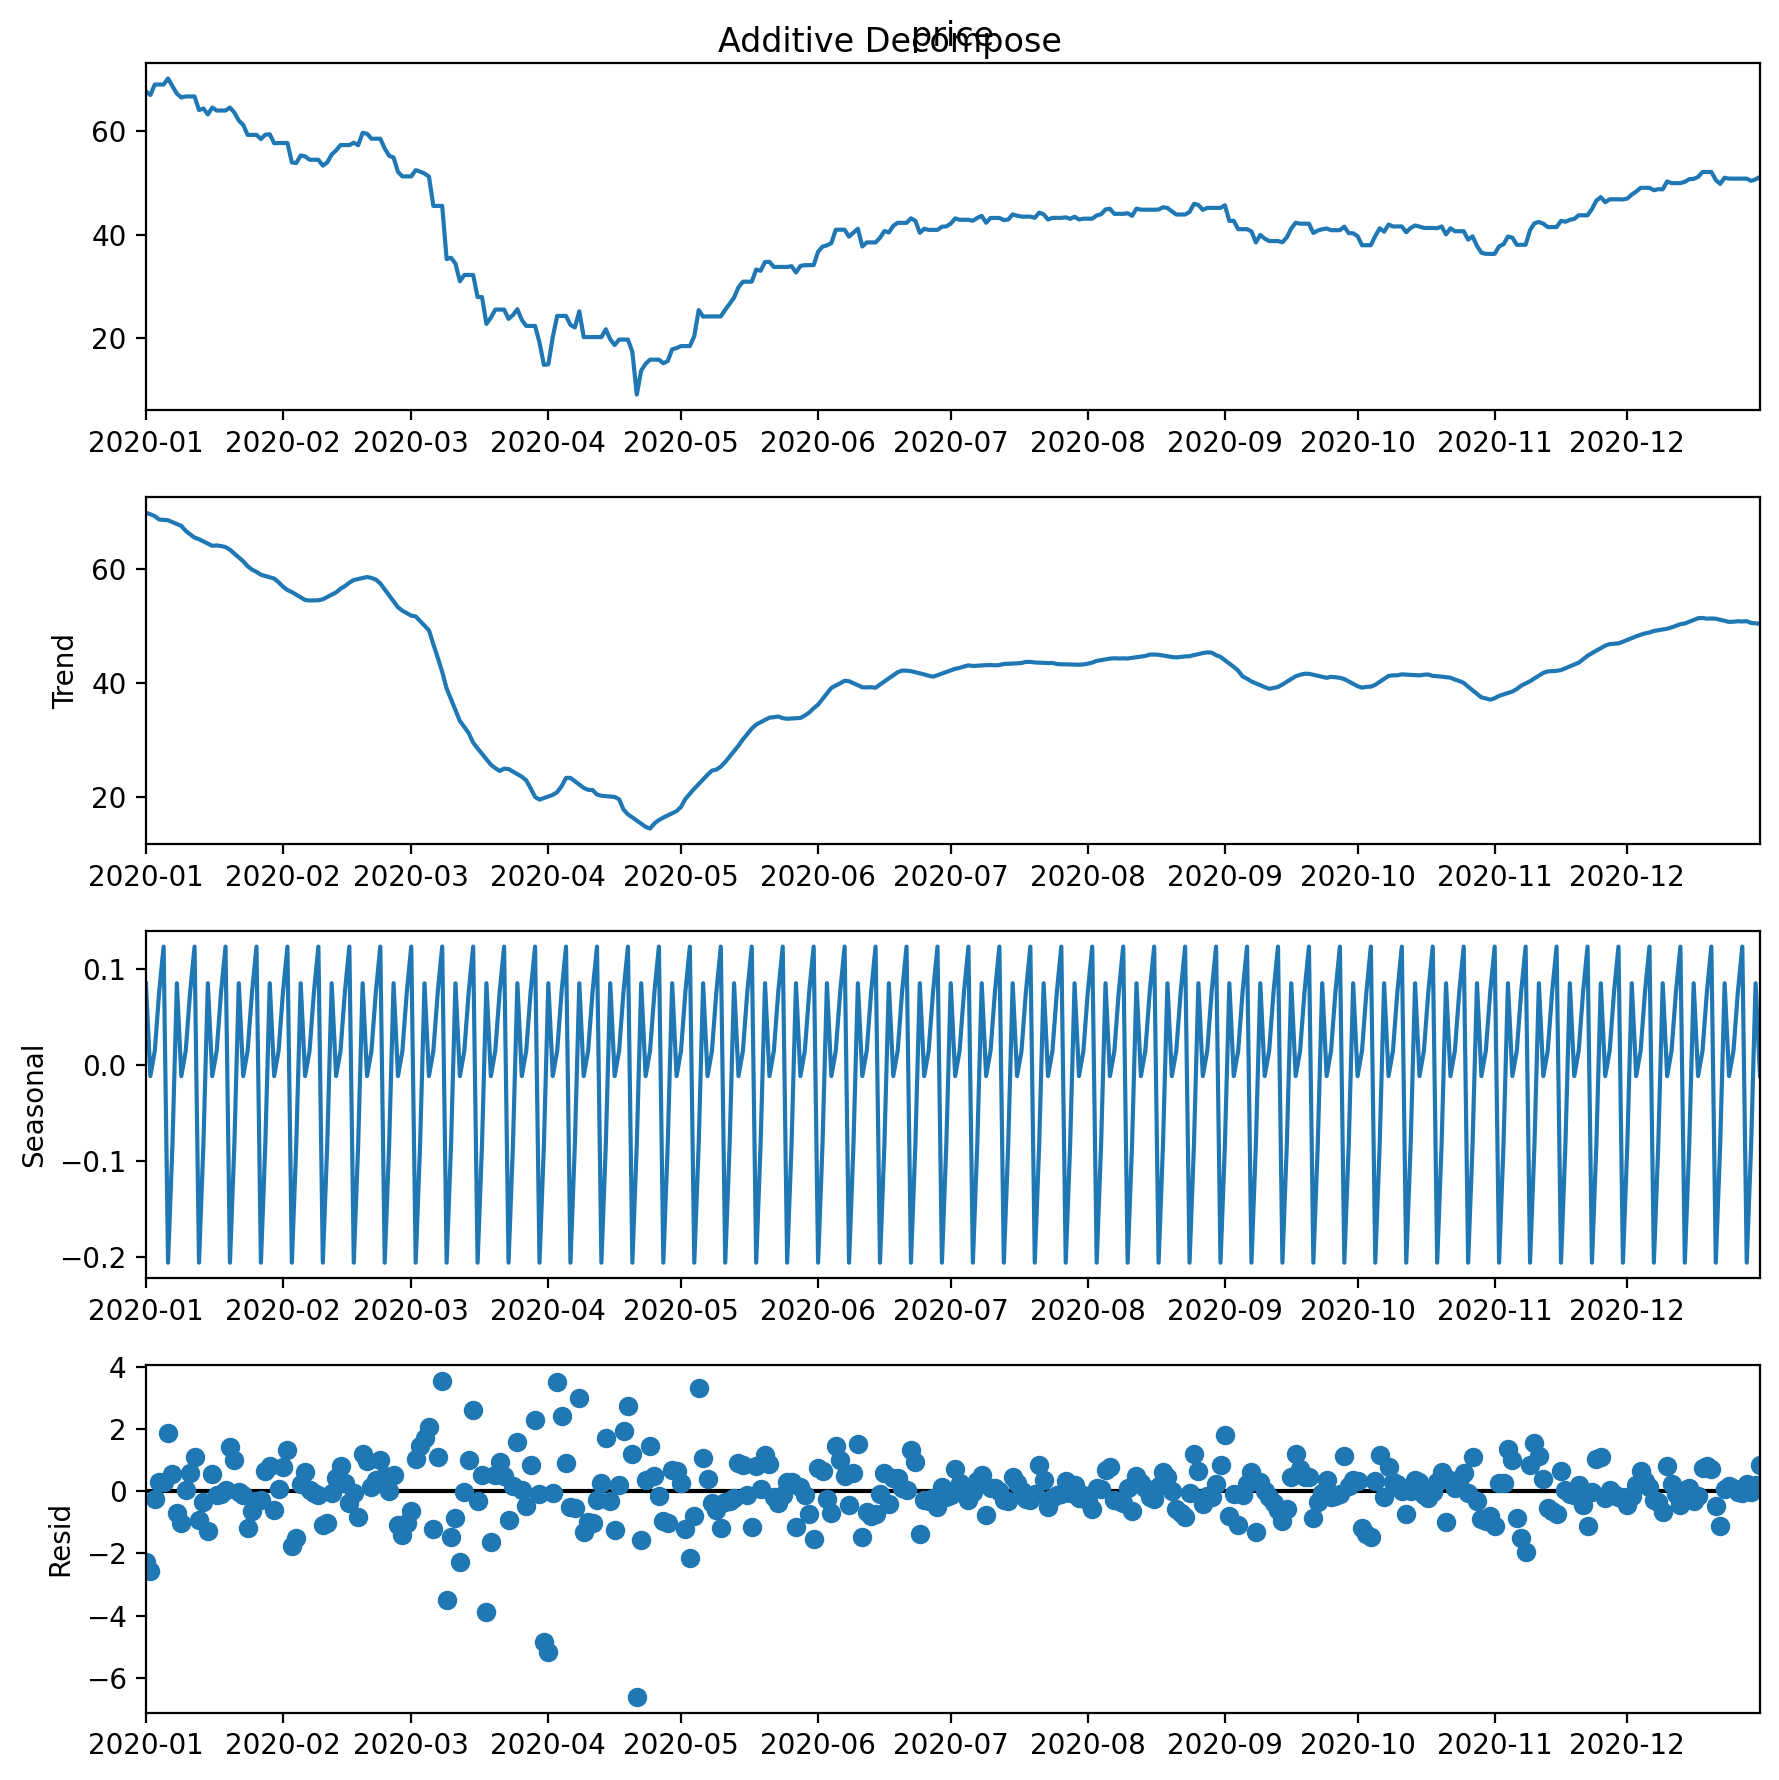

In [11]:
# Additive Decomposition
plt.rcParams.update({'figure.figsize': (fig_width,fig_width)})
decomp_add = seasonal_decompose(data['price'], model='additive', extrapolate_trend='freq')
decomp_add.plot().suptitle('Additive Decompose')
plt.tight_layout()
plt.show()

# Stationarity
<a id="sec:stationarity"></a>
A stationary series is one where the values of the series is not a function of time. That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.


A stationary time series is devoid of seasonal effects as well. It is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. 


Forecasting a stationary series is relatively easy and the forecasts are more reliable. Autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors. We know that linear regression works best if the predictors (X variables) are not correlated against each other. Stationarising the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.


The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.


## Check for stationarity
### Summary Statistics
Before we transform a series, we must figure out if it is stationary or not. The stationarity of a series can be established by looking at the plot of the series like we did earlier and ask "is there a dependence on time?".

A quick and dirty check to see if your time series is non-stationary is to review summary statistics. We can split the series into two or more contiguous parts and compute the summary statistics like the mean, variance and autocorrelation (correlation of a signal with a delayed copy of itself as a function of delay). If the summary statistics are quite different, then the series is not likely to be stationary. Here, we will compare 2020 to 2001.

In [12]:
partition_1 = df.loc[df.year.isin(['2001'])]
partition_2 = df.loc[df.year.isin(['2020'])]
print("MEAN\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].mean(), partition_2['price'].mean()))
print(" VAR\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].var(), partition_2['price'].var()))

MEAN	P1: 24.46	P2: 41.84
 VAR	P1: 11.85	P2: 146.67


Clearly, the means and variances are significantly different from each other. This signals to us that we have a non-stationary time series.

Let’s take one step back and check if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

In [ ]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
hist = df['price'].hist()
plt.show()

Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution of the observations may be another indicator of a non-stationary time series. Reviewing the plot of the time series again, we can see that there may be a mild seasonality in the data, and it looks like the seasonality component is growing.
This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

Below is the same histogram with a log transform of the time series. Running the example, we cannot see the familiar Gaussian-like or Uniform-like distribution of values.

In [ ]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
log_hist = np.log(df['price']) 
plt.hist(log_hist)
plt.show()

### Unit root tests
In statistics, a unit root test tests whether a time series variable is non-stationary and possesses a unit root. The null hypothesis is generally defined as the presence of a unit root and the alternative hypothesis is either stationarity, trend stationarity or explosive root depending on the test used.


The Augmented Dickey-Fuller (ADF) test is a type of unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.


There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


The ADF statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence $\alpha$. In the ADF test, the null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value in the ADF test is less than the significance level ($\alpha = $ 0.05), you reject the null hypothesis.

There are multiple implementations of unit root tests:
 - Augmented Dickey Fuller test (ADF test)
 - Kwiatkowski-Phillips-Schmidt-Shin (KPSS test - trend stationary)
 - Philips Perron test (PP test)


The KPSS test is used to test for trend stationarity. The null hypothesis and the p-value interpretation is the opposite of the ADF test.



#### ASIDE
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

 - $H_0$ (Null Hypothesis): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 - $H_a$ (Altenative Hypothesis): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a significance level (such as $\alpha = $5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).
 - p-value $>$ 0.05: Fail to reject $H_0$, the data has a unit root and is non-stationary.
 - p-value $<=$ 0.05: Reject $H_0$, the data does not have a unit root and is stationary.

In [14]:
"""======================="""
""" ADFULLER TEST         """
"""======================="""
## Make a series to run the test on
table_daily_prices = pd.Series(data=df['price'].to_numpy(), index=df.index)

## Run the Augmented Dickey-Fuller test
result = adfuller( table_daily_prices )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -2.0457

p-value: 0.2669

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
NON-STATIONARY series


In [15]:
"""======================="""
""" KPSS TEST             """
"""======================="""
from statsmodels.tsa.stattools import kpss
## Run the Kwiatkowski-Phillips-Schmidt-Shin test
result = kpss( table_daily_prices )
print('KPSS Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[3].items():
    print('%s: %.2f' % (key, value))

## Print the result
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue<alpha:
    print("NON-STATIONARY series")
elif pvalue>=alpha:
    print("STATIONARY series")

KPSS Statistic: 18.0810

p-value: 0.0100

Critical Values:
10%: 0.35
5%: 0.46
2.5%: 0.57
1%: 0.74

alpha: 0.05
NON-STATIONARY series


## Making the time series stationary
We can make a time series is stationary by applying any of the following methods:
1. Differencing the series (first order, second order, ... etc.)
2. Take the natural log of the series
3. Take the nth root of the series
4. Combination of the above
In general, the most convenient way to stationarise the series is first order differencing. We've already seen the natural log of the series above. 


Let's quickly cover first order differencing. If $X_t$ is the value of the time series at time $t$, then the first difference is $X = X_t - X_{t-1}$. That is, subtract previous value from the current value. If first order differencing doesn't work, we can move to second order differencing, then third and so on.


In [16]:
## FIRST ORDER DIFFERENCING
## Daily returns
daily_series_diff1 = table_daily_prices.diff(periods=1).dropna()
daily_series_diff1.head()

date
1987-05-21   -0.18
1987-05-22    0.10
1987-05-23    0.00
1987-05-24    0.00
1987-05-25    0.05
dtype: float64

In [17]:
## SECOND ORDER DIFFERENCING
## Differences in returns
daily_series_diff2 = daily_series_diff1.diff(periods=1).dropna()
## Make sure to drop the NaNs (not a numbers) because
## they will cause issues later when we design our model and 
## perform our forecasts.
daily_series_diff2.head()

date
1987-05-22    0.28
1987-05-23   -0.10
1987-05-24    0.00
1987-05-25    0.05
1987-05-26   -0.02
dtype: float64

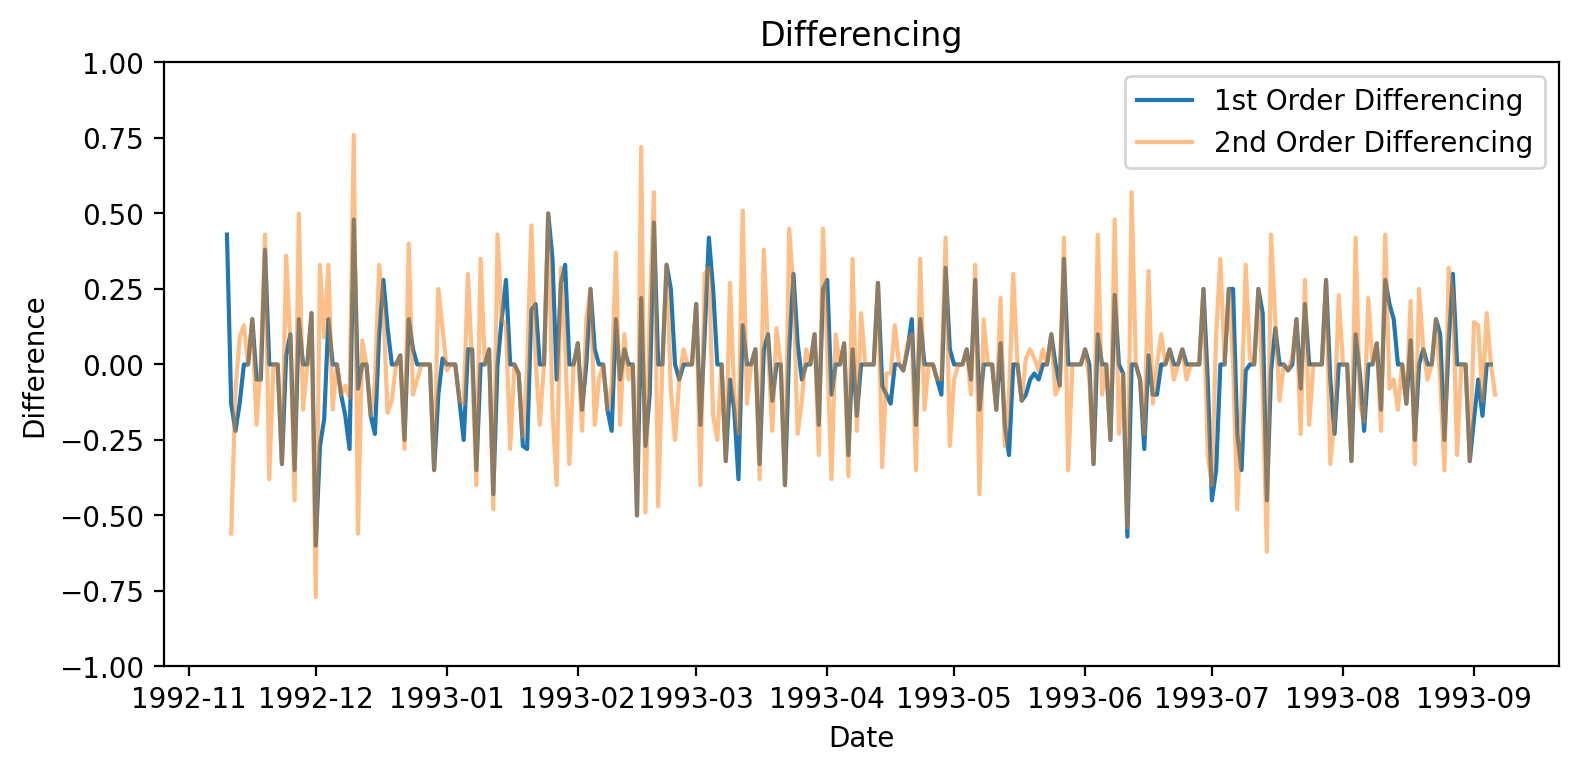

In [18]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, ax = plt.subplots()
ax.plot(daily_series_diff1[2000:2300], label='1st Order Differencing', alpha=1.0)
ax.plot(daily_series_diff2[2000:2300], label='2nd Order Differencing', alpha=0.5)
plt.ylim([-1,1])

legend = ax.legend(loc='upper right')
plt.title('Differencing')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

Here, we can see that when we use a differencing method, the time series starts to look more like a stationary time series, i.e. not dependent on time and void of a trend/seasonality. Let's re-run the ADF test on the differenced time series to see if it's stationary.|

In [19]:
"""======================="""
""" ADF TEST: 1st order   """
"""======================="""
result = adfuller( daily_series_diff1 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -15.2702

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


In [21]:
"""======================="""
""" ADF TEST: 2nd order   """
"""======================="""
result = adfuller( daily_series_diff2 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -30.2107

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


The following code is used to test the number of differences required to fail to reject the null hypothesis.

In [22]:
## Number of differences required for a stationary series
## augmented Dickey–Fuller test (adf test)
print(" ADF Test: ",ndiffs(table_daily_prices, test='adf'))
## Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
print("KPSS Test: ",ndiffs(table_daily_prices, test='kpss'))
## Phillips–Perron (PP) test:
print("  PP Test: ",ndiffs(table_daily_prices, test='pp'))

 ADF Test:  1
KPSS Test:  1
  PP Test:  1


# Autocorrelation and partial autocorrelation functions
After a time series has been stationarized by differencing, the next step in fitting an autoregressive integrated moving average (ARIMA) model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 


We can do this by looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series. You can tentatively identify the numbers of AR and/or MA terms that are needed. 


The autocorrelation function (ACF) plot is merely a bar chart of the coefficients of correlation between a time series and lags of itself. The partial autocorrelation function (PACF) plot is a plot of the partial correlation coefficients between the series and lags of itself. 


In general, the "*partial*" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable $Y$ on other variables $X_1$, $X_2$, and $X_3$, the partial correlation between $Y$ and $X_3$ is the amount of correlation between $Y$ and $X_3$ that is not explained by their common correlations with $X_1$ and $X_2$. This partial correlation can be computed as the square root of the reduction in variance that is achieved by adding $X_3$ to the regression of $Y$ on $X_1$ and $X_2$.


A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between $Y_t$ and $Y_{t-1}$, which is presumably also the correlation between $Y_{t-1}$ and $Y_{t-2}$. But if $Y_t$ is correlated with $Y_{t-1}$, and $Y_{t-1}$ is equally correlated with $Y_{t-2}$, then we should also expect to find correlation between $Y_t$ and $Y_{t-2}$. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

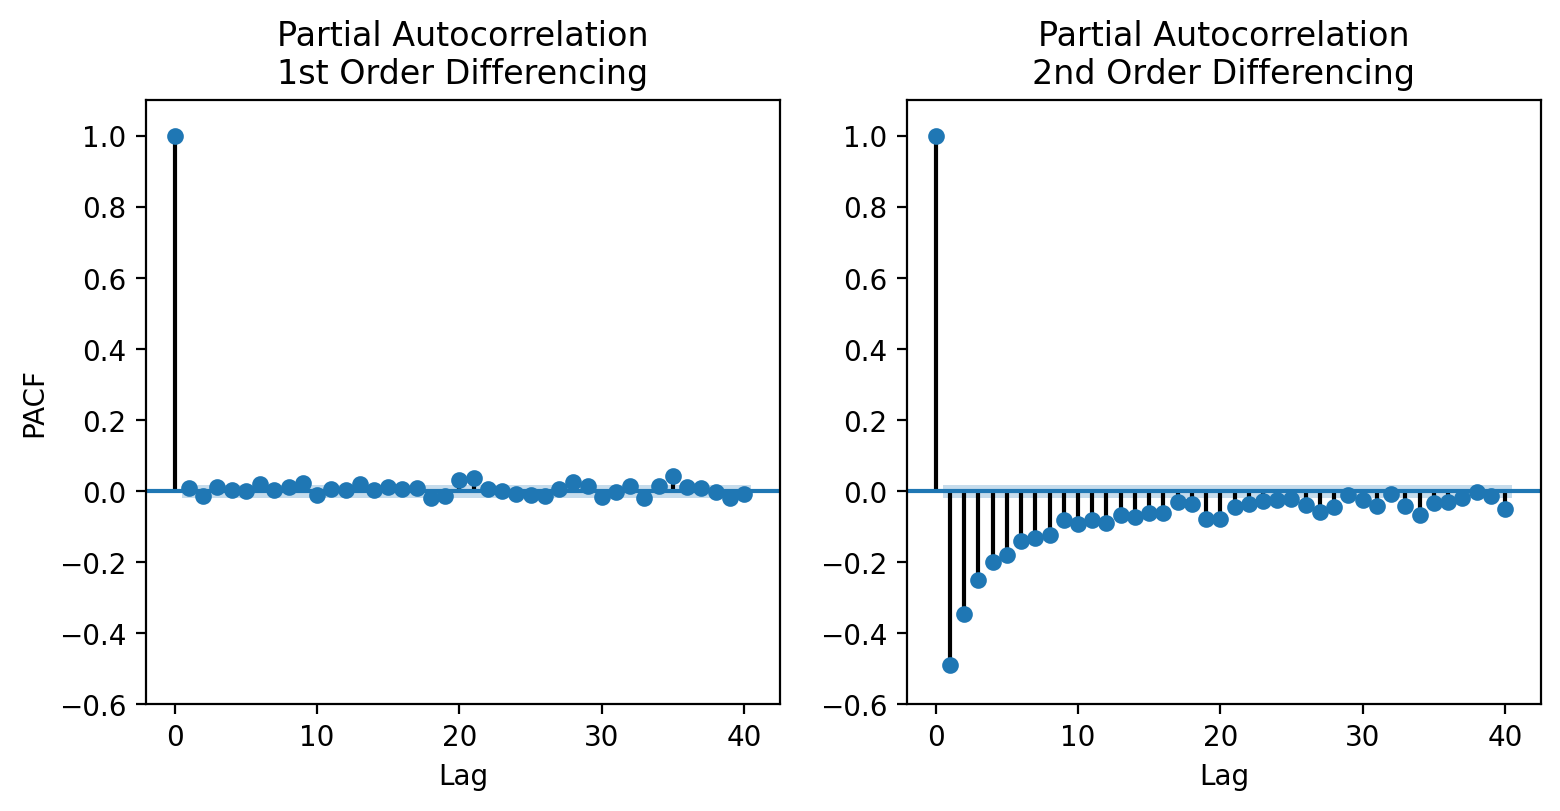

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_pacf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Partial Autocorrelation\n1st Order Differencing")
plot_pacf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Partial Autocorrelation\n2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('PACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

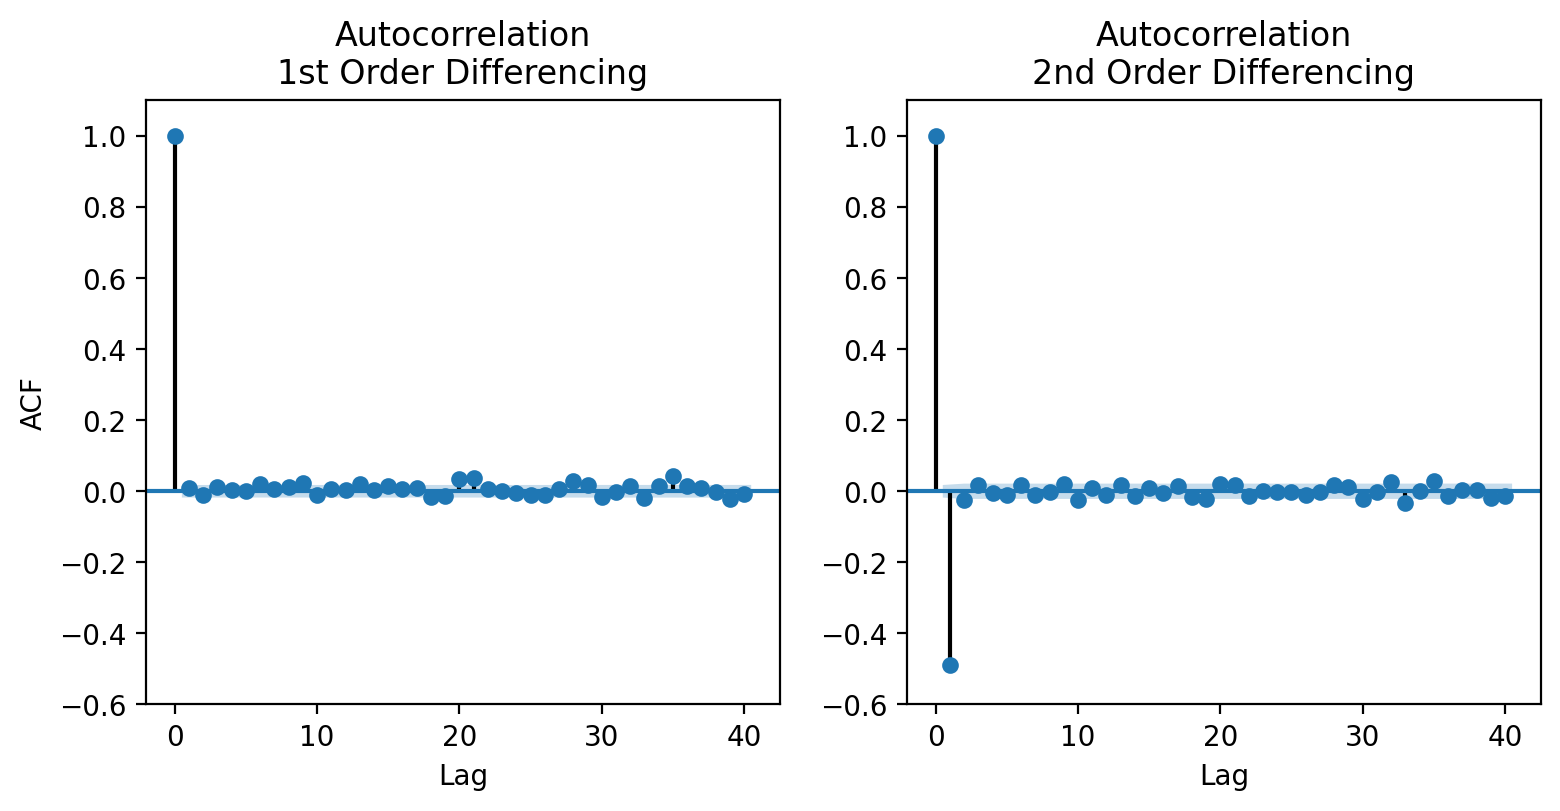

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_acf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Autocorrelation\n1st Order Differencing")
plot_acf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Autocorrelation\n2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

## Lag plots
A lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

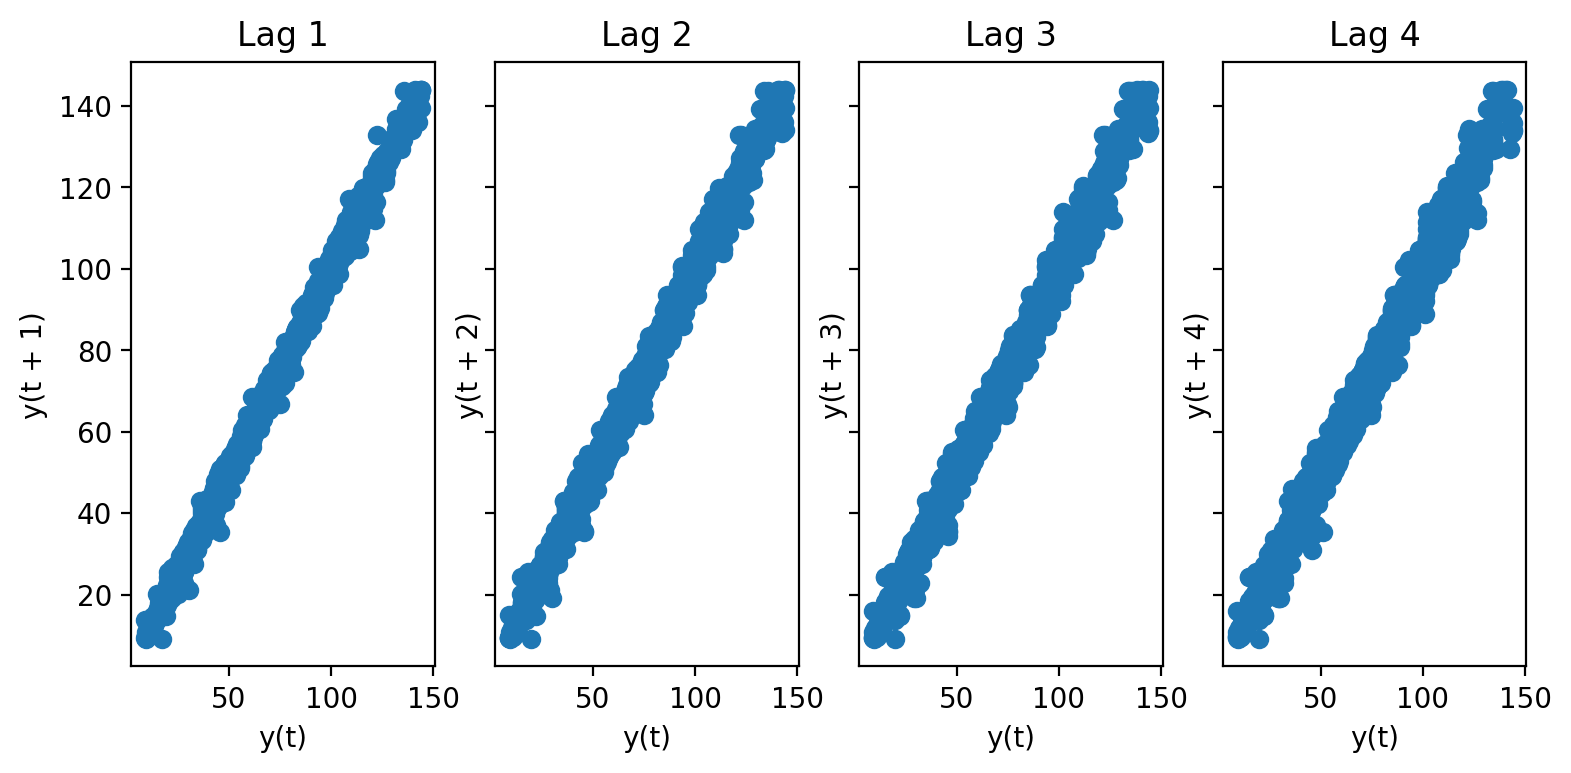

In [31]:
from pandas.plotting import lag_plot
fig, axes = plt.subplots(1, 4, figsize=(fig_width,fig_height), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['price'], lag=i+1, ax=ax)
    ax.set_title('Lag ' + str(i+1))

# Time for the Machine to Learn and predict

In [ ]:
import pmdarima as pm
model = pm.auto_arima(table_daily_prices, 
                      start_p=1, 
                      start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3,          # maximum p 
                      max_q=3,          # maximum q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(table_daily_prices, order=(1, 0, 1)).fit(transparams=False)
print(model.summary())

In [ ]:
ARIMA_Predict = model.predict(start='06/30/2020', end='06/30/2021')

In [ ]:
ARIMA_Predict

In [ ]:
prediction = pd.DataFrame(ARIMA_Predict, columns=['predictions'])#.to_csv('prediction.csv')
#prediction.head()
ARIMA2021 = prediction[(prediction.index >= '2019-12-31')] 
ARIMA2021.head()

In [ ]:
start = '2000-01-01'
end   = '2019-12-31'
"""=================================="""
""" SPLIT INTO TRAINING & TESTS SETS """
"""=================================="""
train = df[(df['date' ] >= start) & (df['date' ] < end)]
test  = df[df['date' ] >= end]

In [ ]:
from fbprophet import Prophet
d={'ds':train['date'],'y':train['price']}
df_pred=pd.DataFrame(data=d)

model = Prophet(daily_seasonality=False)
model.fit(df_pred)

In [ ]:
future = model.make_future_dataframe(periods=548)
forecast = model.predict(future)

In [ ]:
plt.figure()
model.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Brent Oil Price Prediction')
plt.xlim([dt.date(2015, 1, 1), dt.date(2022, 1, 1)])
plt.ylim([0,200])

In [ ]:
forecast2021 = forecast[(forecast['ds' ] >= end)]
forecast2021.yhat.describe()

In [ ]:
ARIMA2021.describe()